# Data Exploration

## Initialization

Installing dependencies



In [2]:
# Install p7zip-full package
!apt-get update -y
!apt-get install -y p7zip-full
!pip install lxml

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

Import libraries

In [3]:
import os
import pandas as pd
import sqlite3
from lxml import etree

Download dataset from URL and extract XMLs from archieve

In [4]:
DATASET_URL="https://archive.org/download/stackexchange/datascience.stackexchange.com.7z"
DATASET_DIR="dataset"

if not os.path.isdir(DATASET_DIR):
  !mkdir -p dataset

if not os.path.isfile("archive.7z"):
   !wget -O archive.7z $DATASET_URL
   !7z x archive.7z -o$DATASET_DIR -y
   print('dataset downloaded')
else:
   print('dataset already exists')

dataset already exists


Import data from data source into Pandas data frames

In [5]:
df_badges = pd.read_xml("dataset/Badges.xml")
df_comments = pd.read_xml("dataset/Comments.xml")
df_post_links = pd.read_xml("dataset/PostLinks.xml")
df_tags = pd.read_xml("dataset/Tags.xml")
df_user = pd.read_xml("dataset/Users.xml")
df_votes = pd.read_xml("dataset/Votes.xml")

In [6]:
# Handle large XML files
#df_post_history = pd.read_xml("dataset/PostHistory.xml")
#df_posts = pd.read_xml("dataset/Posts.xml")

def parse_large_xml(file_path):
  data = []
  chunk_size = 1000
  fieldnames = []
  df = pd.DataFrame()

  tree = etree.parse(file_path)
  root = tree.getroot()

  for i, e in enumerate(root):
    data.append(e.attrib)

    if i == 0:
      fieldnames = e.attrib.keys()

    if (i + 1) % chunk_size == 0:
      df_chunk = pd.DataFrame(data)
      df = pd.concat([df, df_chunk], ignore_index=True).reindex(columns=fieldnames)
      data = []

  if data:
    df_chunk = pd.DataFrame(data)
    df = pd.concat([df, df_chunk], ignore_index=True).reindex(columns=fieldnames)

  return df

df_post_history = parse_large_xml("./dataset/PostHistory.xml")
df_posts = parse_large_xml("dataset/Posts.xml")

In [7]:
df_badges.info()
df_badges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153617 entries, 0 to 153616
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        153617 non-null  int64 
 1   UserId    153617 non-null  int64 
 2   Name      153617 non-null  object
 3   Date      153617 non-null  object
 4   Class     153617 non-null  int64 
 5   TagBased  153617 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 6.0+ MB


,Id,UserId,Name,Date,Class,TagBased
0,28,26,Teacher,2014-05-14T00:00:58.947,3,False
1,29,36,Teacher,2014-05-14T00:00:58.947,3,False
2,46,34,Teacher,2014-05-14T00:17:25.757,3,False
3,55,22,Teacher,2014-05-14T00:54:48.590,3,False
4,56,51,Teacher,2014-05-14T00:54:48.590,3,False
...,...,...,...,...,...,...
153612,154895,55122,decision-trees,2022-12-03T04:00:05.207,3,True
153613,161553,14675,attention-mechanism,2023-05-18T04:00:20.987,3,True
153614,162497,45264,pandas,2023-05-29T04:01:52.113,3,True
153615,162559,45264,python,2023-05-31T04:02:06.620,2,True


In [8]:
df_comments.info()
df_comments

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82370 entries, 0 to 82369
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               82370 non-null  int64  
 1   PostId           82370 non-null  int64  
 2   Score            82370 non-null  int64  
 3   Text             82370 non-null  object 
 4   CreationDate     82370 non-null  object 
 5   UserId           81774 non-null  float64
 6   UserDisplayName  596 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ MB


,Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName
0,5,5,9,this is a super theoretical AI question. An in...,2014-05-14T00:23:15.437,34.0,None
1,6,7,4,List questions are usually not suited for Stac...,2014-05-14T00:38:19.510,51.0,None
2,9,7,3,This question appears to be off-topic because ...,2014-05-14T01:16:12.623,66.0,None
3,14,7,0,"Fair enough regarding what constitutes a ""vali...",2014-05-14T02:35:50.090,36.0,None
4,80,7,1,@statsRus: Try posting a question like that to...,2014-05-15T21:08:13.933,158.0,None
...,...,...,...,...,...,...,...
82365,127240,128513,0,"Sorry, I am not familiar with the article, I j...",2024-03-31T07:28:57.710,14675.0,None
82366,127241,128513,0,"@noe Oh, they are the search keywords! Thank y...",2024-03-31T07:36:47.593,111872.0,None
82367,127242,128514,0,"This fits stackoverflow better, I think.",2024-03-31T11:21:03.740,155646.0,None
82368,127244,128514,0,I think this is caused by the fact that the 'H...,2024-03-31T13:45:22.607,75157.0,None


In [9]:
df_post_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264422 entries, 0 to 264421
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 264422 non-null  object
 1   PostHistoryTypeId  264422 non-null  object
 2   PostId             264422 non-null  object
 3   RevisionGUID       264422 non-null  object
 4   CreationDate       264422 non-null  object
 5   UserId             254947 non-null  object
 6   Text               205831 non-null  object
 7   ContentLicense     210269 non-null  object
dtypes: object(8)
memory usage: 16.1+ MB


In [10]:
df_post_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             2999 non-null   int64 
 1   CreationDate   2999 non-null   object
 2   PostId         2999 non-null   int64 
 3   RelatedPostId  2999 non-null   int64 
 4   LinkTypeId     2999 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [11]:
df_posts.info()
df_posts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78926 entries, 0 to 78925
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                78926 non-null  object
 1   PostTypeId        78926 non-null  object
 2   CreationDate      78926 non-null  object
 3   Score             78926 non-null  object
 4   ViewCount         36775 non-null  object
 5   Body              78926 non-null  object
 6   OwnerUserId       78448 non-null  object
 7   LastActivityDate  78926 non-null  object
 8   Title             36775 non-null  object
 9   Tags              36775 non-null  object
 10  AnswerCount       36775 non-null  object
 11  CommentCount      78926 non-null  object
 12  ClosedDate        2246 non-null   object
 13  ContentLicense    78926 non-null  object
dtypes: object(14)
memory usage: 8.4+ MB


,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,ClosedDate,ContentLicense
0,5,1,2014-05-13T23:58:30.457,9,968,<p>I've always been interested in machine lear...,5,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,|machine-learning|,1,1,2014-05-14T14:40:25.950,CC BY-SA 3.0
1,7,1,2014-05-14T00:11:06.457,4,510,"<p>As a researcher and instructor, I'm looking...",36,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,|education|open-source|,3,4,2014-05-14T08:40:54.950,CC BY-SA 3.0
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51,2014-05-14T00:36:31.077,NaN,NaN,NaN,0,NaN,CC BY-SA 3.0
3,10,2,2014-05-14T00:53:43.273,13,NaN,"<p>One book that's freely available is ""The El...",22,2014-05-14T00:53:43.273,NaN,NaN,NaN,1,NaN,CC BY-SA 3.0
4,14,1,2014-05-14T01:25:59.677,26,1931,<p>I am sure data science as will be discussed...,66,2020-08-16T13:01:33.543,Is Data Science the Same as Data Mining?,|data-mining|definitions|,4,1,NaN,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78921,128514,1,2024-03-31T08:09:36.047,0,15,<p>I am taking the Coursera assignments on SQL...,161916,2024-03-31T08:09:36.047,how to eal with a column name having comma spa...,|data|sql|databases|,0,3,NaN,CC BY-SA 4.0
78922,128515,1,2024-03-31T08:16:03.360,0,8,<p>I am going through ISL(Python) and in secti...,123574,2024-04-01T02:43:40.607,"Can we calculate Bayes Error rate, if we have ...",|machine-learning|classification|statistics|ba...,0,0,NaN,CC BY-SA 4.0
78923,128516,1,2024-03-31T15:07:28.673,0,23,<p>What is the purpose of the weights?<a href=...,159803,2024-03-31T17:43:38.120,Why torch activation functions contains parame...,|pytorch|,1,0,NaN,CC BY-SA 4.0
78924,128517,2,2024-03-31T17:43:38.120,1,NaN,<p>There are no weights for the <code>nn.Tanh<...,52940,2024-03-31T17:43:38.120,NaN,NaN,NaN,0,NaN,CC BY-SA 4.0


In [12]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             702 non-null    int64  
 1   TagName        702 non-null    object 
 2   Count          702 non-null    int64  
 3   ExcerptPostId  310 non-null    float64
 4   WikiPostId     310 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 27.5+ KB


In [13]:
df_tags

,Id,TagName,Count,ExcerptPostId,WikiPostId
0,1,definitions,39,105.0,104.0
1,2,machine-learning,11403,4909.0,4908.0
2,3,bigdata,456,66.0,65.0
3,5,data-mining,1181,80.0,79.0
4,6,databases,100,8960.0,8959.0
...,...,...,...,...,...
697,1290,mann-whitney,1,NaN,NaN
698,1291,f-test,1,NaN,NaN
699,1293,residual-connection,1,NaN,NaN
700,1295,standardization,3,NaN,NaN


In [14]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137433 entries, 0 to 137432
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id              137433 non-null  int64  
 1   Reputation      137433 non-null  int64  
 2   CreationDate    137433 non-null  object 
 3   DisplayName     137423 non-null  object 
 4   LastAccessDate  137433 non-null  object 
 5   WebsiteUrl      19843 non-null   object 
 6   Location        53558 non-null   object 
 7   AboutMe         37426 non-null   object 
 8   Views           137433 non-null  int64  
 9   UpVotes         137433 non-null  int64  
 10  DownVotes       137433 non-null  int64  
 11  AccountId       137426 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 12.6+ MB


In [15]:
df_user

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
0,-1,1,2014-05-13T21:29:22.820,Community,2014-05-13T21:29:22.820,http://meta.stackexchange.com/,on the server farm,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",546,0,0,-1.0
1,1,101,2014-05-13T22:58:54.810,Adam Lear,2024-03-11T21:29:14.793,None,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,725,0,0,37099.0
2,2,101,2014-05-13T22:59:19.787,Geoff Dalgas,2019-09-03T19:10:22.217,http://stackoverflow.com,"Corvallis, OR",<p>Dev #2 who helped create Stack Overflow cur...,12,0,0,2.0
3,3,101,2014-05-13T23:15:34.483,hichris123,2020-12-16T17:41:49.610,None,None,<p>I'm a student interested in technology.</p>...,9,1,3,3046327.0
4,4,101,2014-05-13T23:16:09.937,Ben Collins,2014-08-04T15:25:54.810,http://benjamincollins.com,Republic of Texas,"<p>I work with <a href=""https://olo.com"" rel=""...",9,0,0,2365.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137428,161920,1,2024-03-31T15:11:06.360,Gopal Matcha,2024-03-31T15:11:06.360,None,None,None,0,0,0,22027127.0
137429,161921,101,2024-03-31T15:22:25.260,vahid sabet,2024-04-06T08:46:46.183,None,None,<p>I'm software engineer and instructor of com...,0,0,0,4650054.0
137430,161922,1,2024-03-31T15:28:12.257,rehanqb,2024-04-04T14:58:48.273,None,None,None,0,0,0,27882143.0
137431,161923,1,2024-03-31T16:48:38.390,kashif,2024-03-31T16:48:38.390,None,pakistan,None,0,0,0,27061156.0


In [16]:
df_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222642 entries, 0 to 222641
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            222642 non-null  int64  
 1   PostId        222642 non-null  int64  
 2   VoteTypeId    222642 non-null  int64  
 3   CreationDate  222642 non-null  object 
 4   UserId        684 non-null     float64
 5   BountyAmount  1059 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 10.2+ MB


## Data Aggregation

Import data into SQLite database

In [17]:
database_name = 'data_exploration.db'

In [18]:
with sqlite3.connect(database_name) as conn:
    df_badges.to_sql("badges", conn, if_exists='replace', index=False)
    df_comments.to_sql("comments", conn, if_exists='replace', index=False)
    df_post_history.to_sql("post_history", conn, if_exists='replace', index=False)
    df_post_links.to_sql("post_links", conn, if_exists='replace', index=False)
    df_posts.to_sql("posts", conn, if_exists='replace', index=False)
    df_tags.to_sql("tags", conn, if_exists='replace', index=False)
    df_user.to_sql("users", conn, if_exists='replace', index=False)
    df_votes.to_sql("votes", conn, if_exists='replace', index=False)


## Data Exploration and Cleaning



ERD Diagram provided by StackExchange:

![ERD Diagram of StackExchange Data Dump](https://i.sstatic.net/AyIkW.png)

In [19]:
query_str = """
SELECT *
FROM sqlite_master
"""

with sqlite3.connect(database_name) as conn:
  cursor = conn.cursor()
  cursor.execute(query_str)
  rows = cursor.fetchmany(10)
  print(rows)

[('table', 'sqlite_sequence', 'sqlite_sequence', 92522, 'CREATE TABLE sqlite_sequence(name,seq)'), ('table', 'badges', 'badges', 87681, 'CREATE TABLE "badges" (\n"Id" INTEGER,\n  "UserId" INTEGER,\n  "Name" TEXT,\n  "Date" TEXT,\n  "Class" INTEGER,\n  "TagBased" INTEGER\n)'), ('table', 'comments', 'comments', 78979, 'CREATE TABLE "comments" (\n"Id" INTEGER,\n  "PostId" INTEGER,\n  "Score" INTEGER,\n  "Text" TEXT,\n  "CreationDate" TEXT,\n  "UserId" REAL,\n  "UserDisplayName" TEXT\n)'), ('table', 'post_history', 'post_history', 2, 'CREATE TABLE "post_history" (\n"Id" TEXT,\n  "PostHistoryTypeId" TEXT,\n  "PostId" TEXT,\n  "RevisionGUID" TEXT,\n  "CreationDate" TEXT,\n  "UserId" TEXT,\n  "Text" TEXT,\n  "ContentLicense" TEXT\n)'), ('table', 'post_links', 'post_links', 2007, 'CREATE TABLE "post_links" (\n"Id" INTEGER,\n  "CreationDate" TEXT,\n  "PostId" INTEGER,\n  "RelatedPostId" INTEGER,\n  "LinkTypeId" INTEGER\n)'), ('table', 'posts', 'posts', 7151, 'CREATE TABLE "posts" (\n"Id" TEXT,\

In [20]:
# Get table names
query_sql = """
SELECT name
FROM sqlite_master
WHERE type='table'
and name not like 'sqlite_%'
"""

table_names = []

with sqlite3.connect(database_name) as conn:
  cursor = conn.cursor()
  cursor.execute(query_sql)
  table_names = [row[0] for row in cursor.fetchall()]

print(table_names)

['badges', 'comments', 'post_history', 'post_links', 'posts', 'tags', 'users', 'votes']


In [21]:
# Get column names and dtypes
table_columns = {}
table_column_dtypes = {}
for table_name in table_names:
    with sqlite3.connect(database_name) as conn:
        cursor = conn.cursor()
        cursor.execute(f"PRAGMA table_info({table_name});")
        result = cursor.fetchall()
        table_columns[table_name] = [row[1] for row in result]
        table_column_dtypes[table_name] = {row[1] : row[2] for row in result}

print(','.join(table_columns['badges']))
print(table_column_dtypes)


Id,UserId,Name,Date,Class,TagBased
{'badges': {'Id': 'INTEGER', 'UserId': 'INTEGER', 'Name': 'TEXT', 'Date': 'TEXT', 'Class': 'INTEGER', 'TagBased': 'INTEGER'}, 'comments': {'Id': 'INTEGER', 'PostId': 'INTEGER', 'Score': 'INTEGER', 'Text': 'TEXT', 'CreationDate': 'TEXT', 'UserId': 'REAL', 'UserDisplayName': 'TEXT'}, 'post_history': {'Id': 'TEXT', 'PostHistoryTypeId': 'TEXT', 'PostId': 'TEXT', 'RevisionGUID': 'TEXT', 'CreationDate': 'TEXT', 'UserId': 'TEXT', 'Text': 'TEXT', 'ContentLicense': 'TEXT'}, 'post_links': {'Id': 'INTEGER', 'CreationDate': 'TEXT', 'PostId': 'INTEGER', 'RelatedPostId': 'INTEGER', 'LinkTypeId': 'INTEGER'}, 'posts': {'Id': 'TEXT', 'PostTypeId': 'TEXT', 'CreationDate': 'TEXT', 'Score': 'TEXT', 'ViewCount': 'TEXT', 'Body': 'TEXT', 'OwnerUserId': 'TEXT', 'LastActivityDate': 'TEXT', 'Title': 'TEXT', 'Tags': 'TEXT', 'AnswerCount': 'TEXT', 'CommentCount': 'TEXT', 'ClosedDate': 'TEXT', 'ContentLicense': 'TEXT'}, 'tags': {'Id': 'INTEGER', 'TagName': 'TEXT', 'Count': 'INTEG

In [22]:
# Create primary key for each table
for table_name in table_names:
    tmp_table_name = "tmp_" + table_name
    column_names = ','.join(table_columns[table_name])
    table_column_dtypes[table_name]['Id'] = 'INTEGER PRIMARY KEY AUTOINCREMENT'
    column_dtypes = [f"{column_name} {data_type}" for column_name, data_type in table_column_dtypes[table_name].items()]

    ddl = f"CREATE TABLE {table_name} ({','.join(column_dtypes)});"

    sql_create_pk = f"""
    PRAGMA foreign_keys=off;
    BEGIN TRANSACTION;
    ALTER TABLE {table_name} RENAME TO {tmp_table_name};
    {ddl}
    INSERT INTO {table_name} ({column_names}) SELECT {column_names} FROM {tmp_table_name};
    DROP TABLE {tmp_table_name};
    COMMIT;
    PRAGMA foreign_keys=on;
    """
    print(sql_create_pk)

    with sqlite3.connect(database_name) as conn:
        cursor = conn.cursor()
        cursor.executescript(sql_create_pk)


    PRAGMA foreign_keys=off;
    BEGIN TRANSACTION;
    ALTER TABLE badges RENAME TO tmp_badges;
    CREATE TABLE badges (Id INTEGER PRIMARY KEY AUTOINCREMENT,UserId INTEGER,Name TEXT,Date TEXT,Class INTEGER,TagBased INTEGER);
    INSERT INTO badges (Id,UserId,Name,Date,Class,TagBased) SELECT Id,UserId,Name,Date,Class,TagBased FROM tmp_badges;
    DROP TABLE tmp_badges;
    COMMIT;
    PRAGMA foreign_keys=on;
    

    PRAGMA foreign_keys=off;
    BEGIN TRANSACTION;
    ALTER TABLE comments RENAME TO tmp_comments;
    CREATE TABLE comments (Id INTEGER PRIMARY KEY AUTOINCREMENT,PostId INTEGER,Score INTEGER,Text TEXT,CreationDate TEXT,UserId REAL,UserDisplayName TEXT);
    INSERT INTO comments (Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName) SELECT Id,PostId,Score,Text,CreationDate,UserId,UserDisplayName FROM tmp_comments;
    DROP TABLE tmp_comments;
    COMMIT;
    PRAGMA foreign_keys=on;
    

    PRAGMA foreign_keys=off;
    BEGIN TRANSACTION;
    ALTER TABLE post_history 

# **Gold Badge User Analysis (Shawn)**

# Look at the Badges data set and identify how many gold badge user there will be.

In [23]:
df_badges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153617 entries, 0 to 153616
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        153617 non-null  int64 
 1   UserId    153617 non-null  int64 
 2   Name      153617 non-null  object
 3   Date      153617 non-null  object
 4   Class     153617 non-null  int64 
 5   TagBased  153617 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 6.0+ MB


# Visulize all the features of the Gold Badge users to gain insight using histogram.

In [24]:
# Show the nuber of users for each class
df_badges["Class"].value_counts()

,count
Class,
3,139115
2,12722
1,1780


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'UserId'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

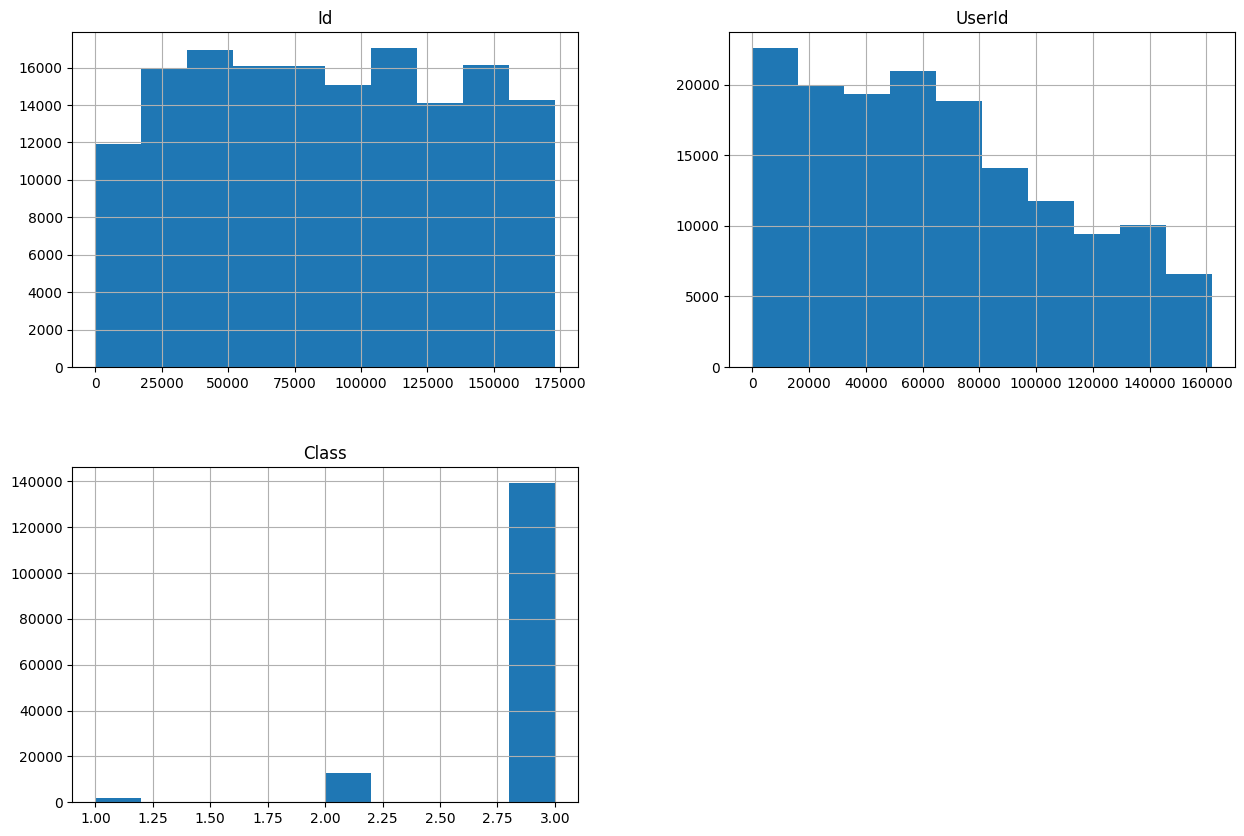

In [25]:
df_badges.hist(figsize=(15,10))

# In order to find the relationship between gold bage and other feartures, we have to join all the data with their UserId

In [26]:
# Join df_gold_badge_user with all the other data frame where UserId = Users.Id

import pandas as pd
# Merge df_gold_badge_user with df_user on UserId and Id
df_gold_badge_user_merged = pd.merge(df_badges, df_user, left_on='UserId', right_on='Id', how='inner')
df_posts = df_posts.dropna()
df_posts['OwnerUserId'] = df_posts['OwnerUserId'].astype('int64')
df_gold_badge_user_merged = pd.merge(df_gold_badge_user_merged, df_posts, left_on='UserId', right_on='OwnerUserId', how='inner')
df_gold_badge_user_merged = pd.merge(df_gold_badge_user_merged, df_comments, left_on='UserId', right_on='UserId', how='inner', suffixes=('_user', '_comment'))

df_gold_badge_user_merged = df_gold_badge_user_merged.drop_duplicates()
df_gold_badge_user_merged = df_gold_badge_user_merged.reset_index(drop=True)
df_gold_badge_user_merged.info()


<ipython-input-26-6dc24dbae254>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_posts['OwnerUserId'] = df_posts['OwnerUserId'].astype('int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856596 entries, 0 to 856595
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id_x              856596 non-null  int64  
 1   UserId            856596 non-null  int64  
 2   Name              856596 non-null  object 
 3   Date              856596 non-null  object 
 4   Class             856596 non-null  int64  
 5   TagBased          856596 non-null  bool   
 6   Id_y              856596 non-null  int64  
 7   Reputation        856596 non-null  int64  
 8   CreationDate_x    856596 non-null  object 
 9   DisplayName       856596 non-null  object 
 10  LastAccessDate    856596 non-null  object 
 11  WebsiteUrl        140532 non-null  object 
 12  Location          517481 non-null  object 
 13  AboutMe           534795 non-null  object 
 14  Views             856596 non-null  int64  
 15  UpVotes           856596 non-null  int64  
 16  DownVotes         85

In [27]:
df_gold_badge_user_merged.head()

,Id_x,UserId,Name,Date,Class,TagBased,Id_y,Reputation,CreationDate_x,DisplayName,...,AnswerCount,CommentCount,ClosedDate,ContentLicense,Id_comment,PostId,Score_comment,Text,CreationDate,UserDisplayName
0,29,36,Teacher,2014-05-14T00:00:58.947,3,False,36,325,2014-05-13T23:54:47.373,statsRus,...,3,4,2014-05-14T08:40:54.950,CC BY-SA 3.0,14,7,0,"Fair enough regarding what constitutes a ""vali...",2014-05-14T02:35:50.090,None
1,29,36,Teacher,2014-05-14T00:00:58.947,3,False,36,325,2014-05-13T23:54:47.373,statsRus,...,3,4,2014-05-14T08:40:54.950,CC BY-SA 3.0,55,71,2,Snarky answer: almost always. There's a huge i...,2014-05-14T23:07:08.427,None
2,29,36,Teacher,2014-05-14T00:00:58.947,3,False,36,325,2014-05-13T23:54:47.373,statsRus,...,3,4,2014-05-14T08:40:54.950,CC BY-SA 3.0,2252,1113,0,The text responses are sentences or phrases of...,2014-09-13T23:02:06.283,None
3,29,36,Teacher,2014-05-14T00:00:58.947,3,False,36,325,2014-05-13T23:54:47.373,statsRus,...,3,4,2014-05-14T08:40:54.950,CC BY-SA 3.0,2275,1113,0,@ffriend: It's a general methodological questi...,2014-09-17T00:58:38.523,None
4,521,295,Teacher,2014-05-27T16:44:29.087,3,False,295,401,2014-05-27T10:10:36.487,Jakubee,...,2,1,2021-02-12T14:22:38.760,CC BY-SA 3.0,162,213,0,"I see. I did study the README file, however I ...",2014-05-27T12:30:31.233,None


In [28]:
# Create a primary key for df_gold_badge_user_merged. It can be the combination of each key from its table

# Assuming you want a composite primary key from the original tables' keys
df_gold_badge_user_merged['CompositePrimaryKey'] = (df_gold_badge_user_merged['Id_user'].astype(str) + '_' +
                                                    df_gold_badge_user_merged['UserId'].astype(str) + '_' +
                                                    df_gold_badge_user_merged['Id_comment'].astype(str) + '_' +
                                                    df_gold_badge_user_merged['PostId'].astype(str))

df_gold_badge_user_merged = df_gold_badge_user_merged.set_index('CompositePrimaryKey')
# Alternatively, you could generate a new unique integer ID using:
# df_gold_badge_user_merged['PrimaryKey'] = range(1, len(df_gold_badge_user_merged) + 1)
# df_gold_badge_user_merged = df_gold_badge_user_merged.set_index('PrimaryKey')


# Convert all the numerical Object type to integer type

In [29]:
df_gold_badge_user_merged['CreationDate'].head()

,CreationDate
CompositePrimaryKey,
7_36_14_7,2014-05-14T02:35:50.090
7_36_55_71,2014-05-14T23:07:08.427
7_36_2252_1113,2014-09-13T23:02:06.283
7_36_2275_1113,2014-09-17T00:58:38.523
1174_295_162_213,2014-05-27T12:30:31.233


In [30]:
df_gold_badge_user_merged['ViewCount'] = df_gold_badge_user_merged['ViewCount'].astype('int64')
df_gold_badge_user_merged['AnswerCount'] = df_gold_badge_user_merged['AnswerCount'].astype('int64')
df_gold_badge_user_merged['CommentCount'] = df_gold_badge_user_merged['CommentCount'].astype('int64')

df_gold_badge_user_merged = df_gold_badge_user_merged.drop(['Id_x', 'Id_y'], axis=1)


# Find the correlation matrix

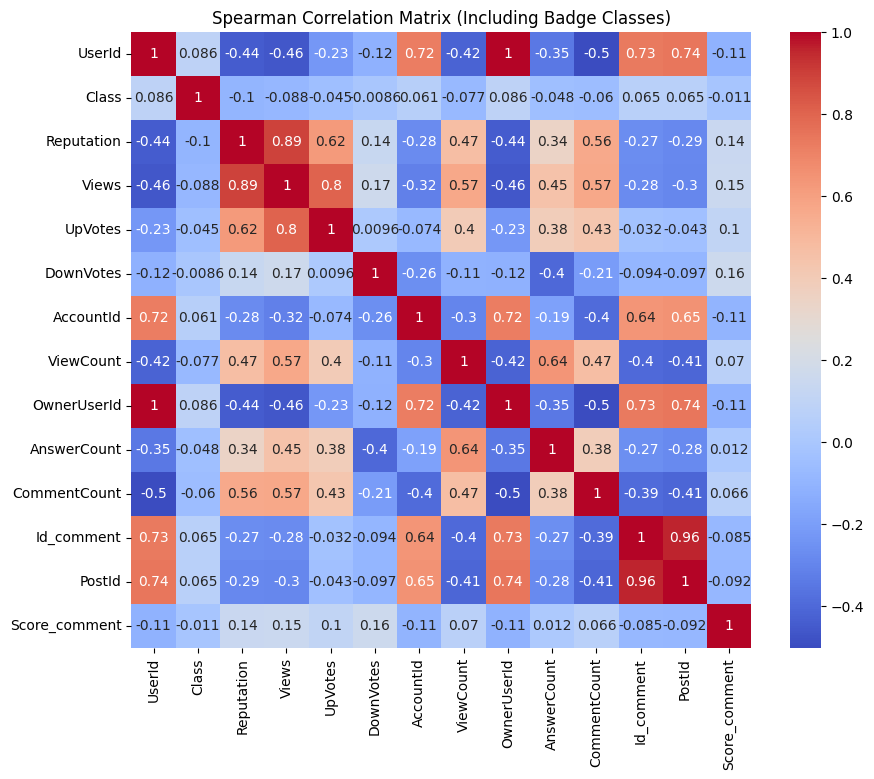

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df_gold_badge_user_merged.select_dtypes(include=[float, int])


spearman_corr = df_numeric.corr(method='spearman')

# Display the Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Matrix (Including Badge Classes)")
plt.show()

# Display the correlation with respect to Bagde's Class in asending order

In [32]:
# Show only correlations of 'Class' with other features
badge_corr = spearman_corr[['Class']].sort_values(by='Class', ascending=True)
print(badge_corr)

                  Class
Reputation    -0.100202
Views         -0.088089
ViewCount     -0.077319
CommentCount  -0.060141
AnswerCount   -0.048403
UpVotes       -0.044695
Score_comment -0.011326
DownVotes     -0.008606
AccountId      0.060981
PostId         0.065160
Id_comment     0.065247
UserId         0.085566
OwnerUserId    0.085566
Class          1.000000


In [33]:
# Drop all the unrelavent columns

columns_to_drop = ['DisplayName', 'EmailHash', 'LastAccessDate', 'WebsiteUrl', 'Location', 'AboutMe', '', 'AccountId', 'CreationDate_user', 'CreationDate_comment', 'UserId', 'PostId', 'Score', 'Text', 'UserDisplayName', 'ContentLicense', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate', 'CommunityOwnedDate', 'ParentId', 'ClosedDate', 'AcceptedAnswerId']
df_gold_badge_user_merged = df_gold_badge_user_merged.drop(columns=columns_to_drop, errors='ignore')
df_gold_badge_user_merged.info()


<class 'pandas.core.frame.DataFrame'>
Index: 856596 entries, 7_36_14_7 to 65147_86339_124955_126215
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Name              856596 non-null  object
 1   Date              856596 non-null  object
 2   Class             856596 non-null  int64 
 3   TagBased          856596 non-null  bool  
 4   Reputation        856596 non-null  int64 
 5   CreationDate_x    856596 non-null  object
 6   Views             856596 non-null  int64 
 7   UpVotes           856596 non-null  int64 
 8   DownVotes         856596 non-null  int64 
 9   Id_user           856596 non-null  object
 10  PostTypeId        856596 non-null  object
 11  CreationDate_y    856596 non-null  object
 12  Score_user        856596 non-null  object
 13  ViewCount         856596 non-null  int64 
 14  Body              856596 non-null  object
 15  LastActivityDate  856596 non-null  object
 16  Title           

# Separate the data based on their badge class

In [34]:
df_gold_badge_user_merged_class_1 = df_gold_badge_user_merged[df_gold_badge_user_merged['Class'] == 1]
df_gold_badge_user_merged_class_2 = df_gold_badge_user_merged[df_gold_badge_user_merged['Class'] == 2]
df_gold_badge_user_merged_class_3 = df_gold_badge_user_merged[df_gold_badge_user_merged['Class'] == 3]

# Visulaize the difference in each top features based on their mean and median

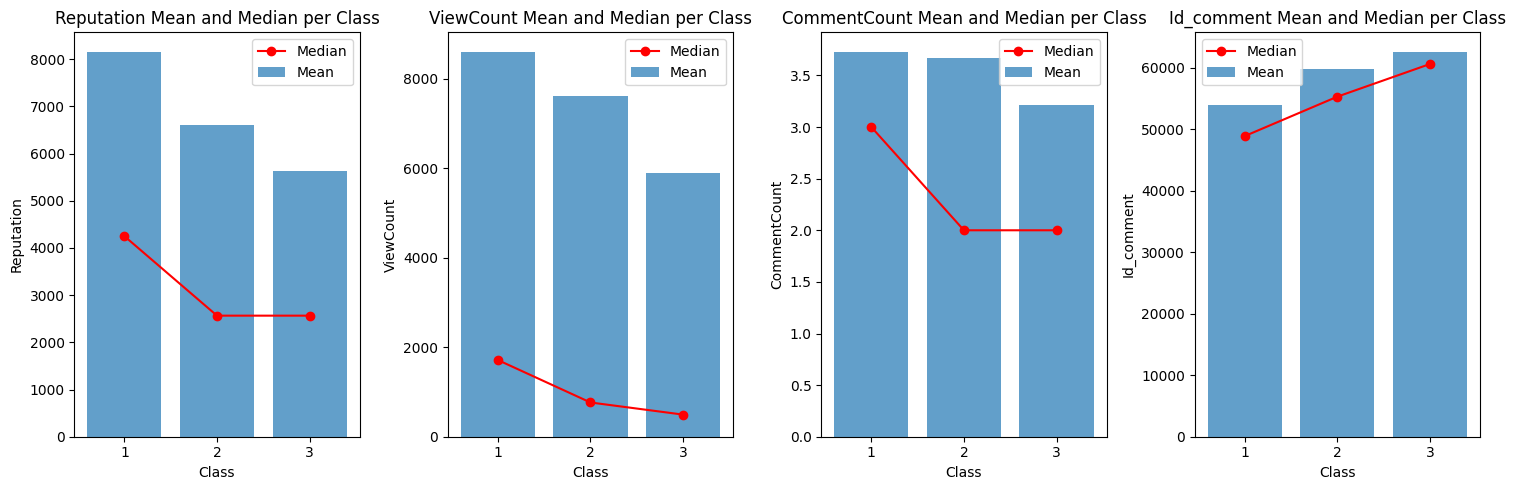

In [35]:
# Calculate the mean and media for each class data and visulize it, for feature Reputation, Views and Commentcount

import matplotlib.pyplot as plt

# Calculate mean and median for each class for specified features
features = ['Reputation', 'ViewCount', 'CommentCount', 'Id_comment']
class_stats = {}
for class_num in df_gold_badge_user_merged['Class'].unique():
  class_data = df_gold_badge_user_merged[df_gold_badge_user_merged['Class'] == class_num]
  class_stats[class_num] = {}
  for feature in features:
    class_stats[class_num][feature] = {
        'mean': class_data[feature].mean(),
        'median': class_data[feature].median()
    }

# Visualize the mean and median for each class and feature
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

for i, feature in enumerate(features):
  means = [class_stats[class_num][feature]['mean'] for class_num in class_stats]
  medians = [class_stats[class_num][feature]['median'] for class_num in class_stats]
  classes = list(class_stats.keys())

  axes[i].bar(classes, means, label='Mean', alpha=0.7)
  axes[i].plot(classes, medians, marker='o', label='Median', color='red')
  axes[i].set_xlabel('Class')
  axes[i].set_ylabel(feature)
  axes[i].set_title(f'{feature} Mean and Median per Class')
  axes[i].legend()

plt.tight_layout()
plt.show()
